In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import time
from sklearn.metrics import roc_curve

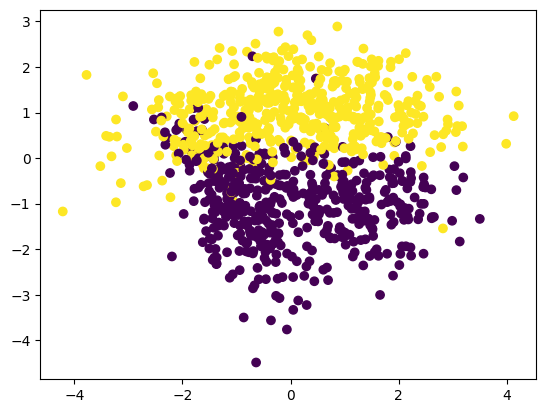

In [19]:
# zad 1.1, 1.2
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [22]:
# zad 1.3
classifiers = [GaussianNB(), QuadraticDiscriminantAnalysis(), KNeighborsClassifier(), SVC(probability=True), DecisionTreeClassifier()]
results = []
error_data = []
for clf in classifiers:
    results_local = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
        temp = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - temp
        temp = time.time()
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)[:, 1]
        accuracy = metrics.accuracy_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        roc_auc = metrics.roc_auc_score(y_test, y_prob)
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        test_time = time.time() - temp
        results_local.append({
            'classifier': clf.__class__.__name__,
            'accuracy': accuracy,
            'recall': recall,
            'precision': precision,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'fpr': fpr,
            'tpr': tpr,
            'train_time': train_time,
            'test_time': test_time
        })
        if (i == 99):
            error_data.append([clf.__class__.__name__, X_test, y_test, y_pred])
    mean_results = {
        'classifier': clf.__class__.__name__,
        'accuracy': np.mean([r['accuracy'] for r in results_local]),
        'recall': np.mean([r['recall'] for r in results_local]),
        'precision': np.mean([r['precision'] for r in results_local]),
        'f1_score': np.mean([r['f1_score'] for r in results_local]),
        'roc_auc': np.mean([r['roc_auc'] for r in results_local]),
        'fpr': results_local[-1]['fpr'],
        'tpr': results_local[-1]['tpr'],
        'train_time': np.mean([r['train_time'] for r in results_local]),
        'test_time': np.mean([r['test_time'] for r in results_local])
    }
    results.append(mean_results)
results_pd = pd.DataFrame(results)
results_pd

,classifier,accuracy,recall,precision,f1_score,roc_auc,fpr,tpr,train_time,test_time
0,GaussianNB,0.903758,0.923461,0.887907,0.905011,0.962391,"[0.0, 0.0, 0.0, 0.006172839506172839, 0.006172...","[0.0, 0.005952380952380952, 0.0297619047619047...",0.000824,0.006828
1,QuadraticDiscriminantAnalysis,0.904848,0.925162,0.888491,0.906125,0.966398,"[0.0, 0.0, 0.0, 0.006172839506172839, 0.006172...","[0.0, 0.005952380952380952, 0.1071428571428571...",0.000671,0.006791
2,KNeighborsClassifier,0.896485,0.910507,0.885077,0.897217,0.953587,"[0.0, 0.018518518518518517, 0.0555555555555555...","[0.0, 0.6309523809523809, 0.8333333333333334, ...",0.000777,0.021422
3,SVC,0.909879,0.939741,0.886303,0.911951,0.969518,"[0.0, 0.0, 0.0, 0.006172839506172839, 0.006172...","[0.0, 0.005952380952380952, 0.5476190476190477...",0.021922,0.012980
4,DecisionTreeClassifier,0.877909,0.877580,0.877531,0.877159,0.878106,"[0.0, 0.1419753086419753, 1.0]","[0.0, 0.9047619047619048, 1.0]",0.001664,0.006583


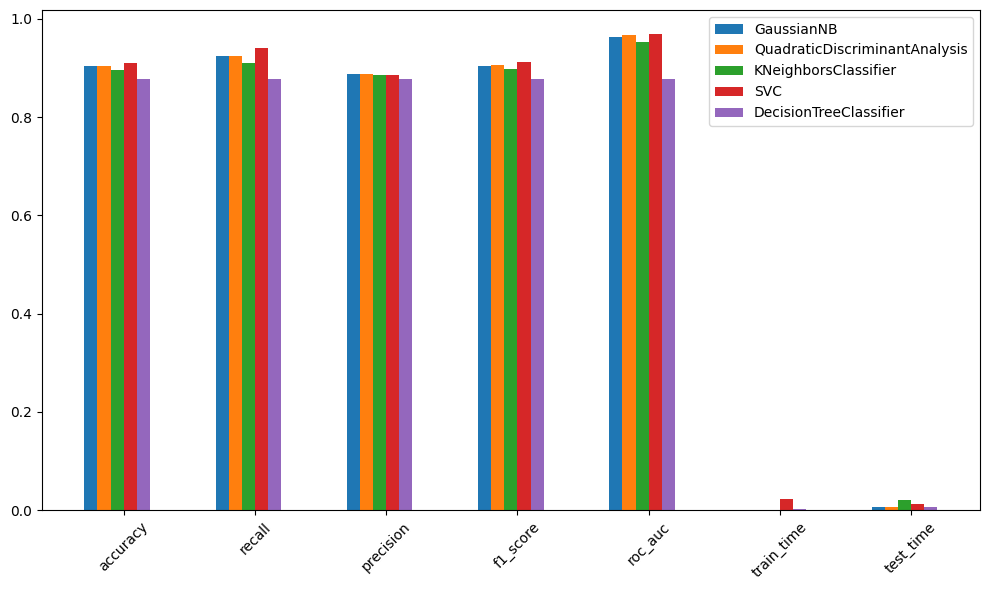

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['accuracy', 'recall', 'precision', 'f1_score', 'roc_auc', 'train_time', 'test_time']

bar_width = 0.1

positions = np.arange(len(metrics_to_plot))

for i, result in enumerate(results):
    values = [result[metric] for metric in metrics_to_plot]
    ax.bar(positions + i * 0.1, values, 0.1, label=result['classifier'])

ax.set_xticks(positions + 0.1 * len(results) / 2)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

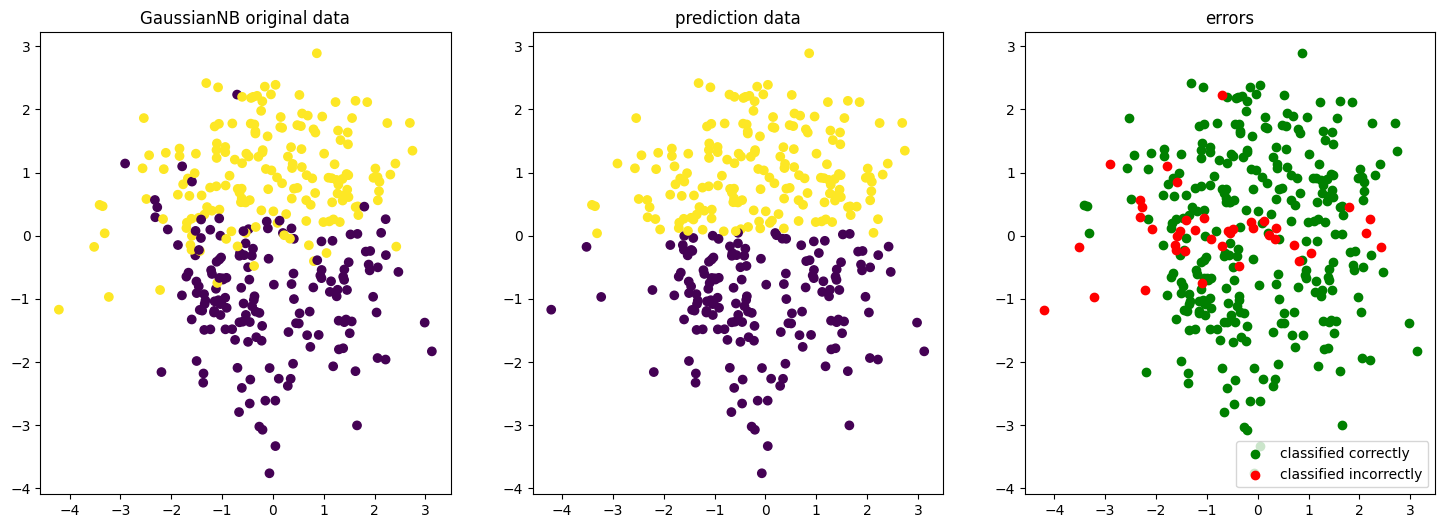

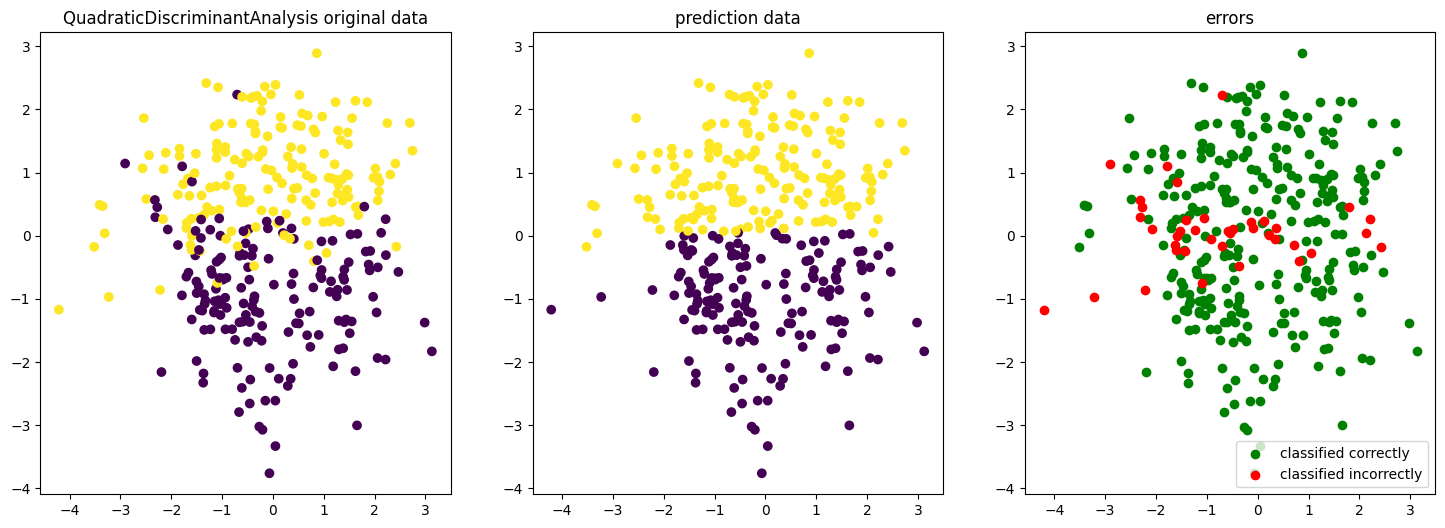

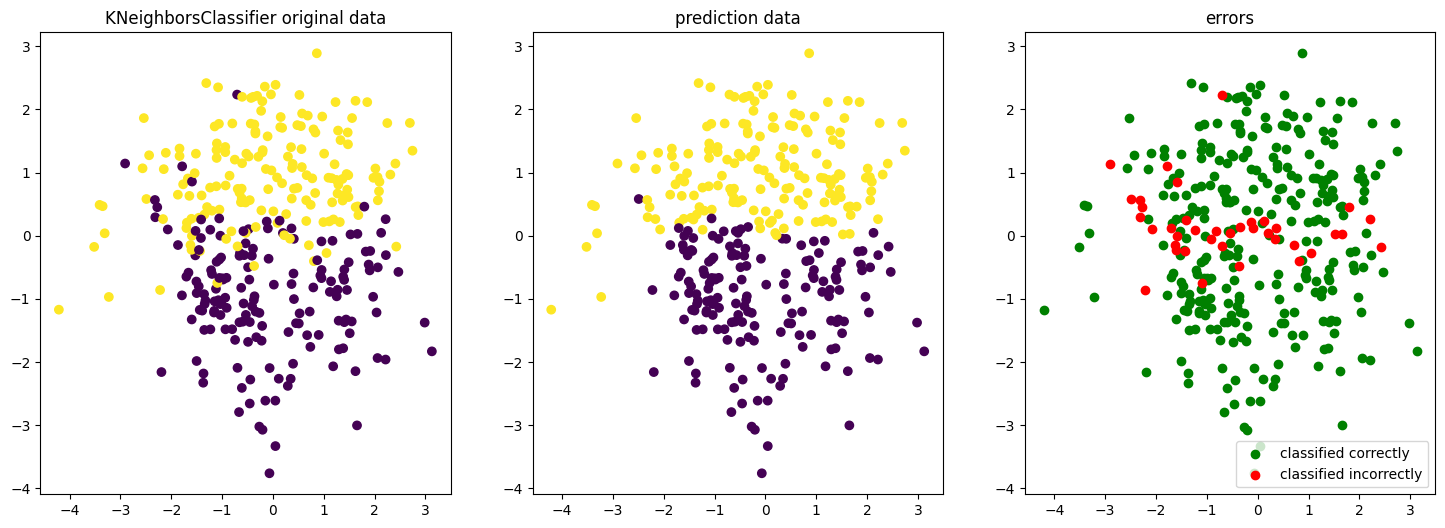

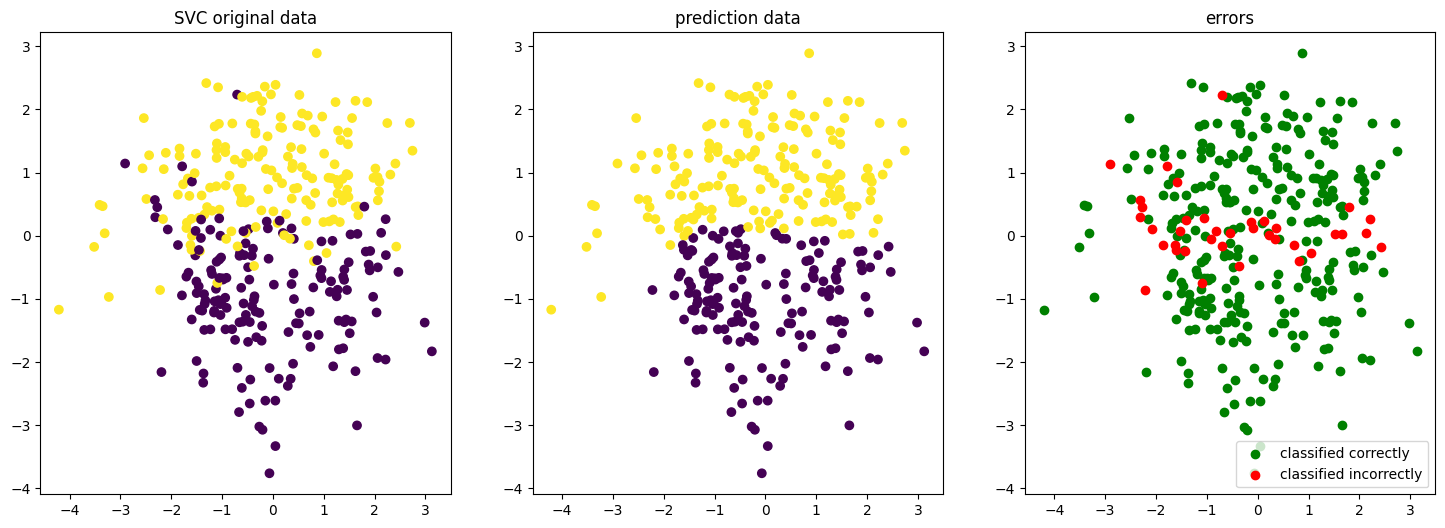

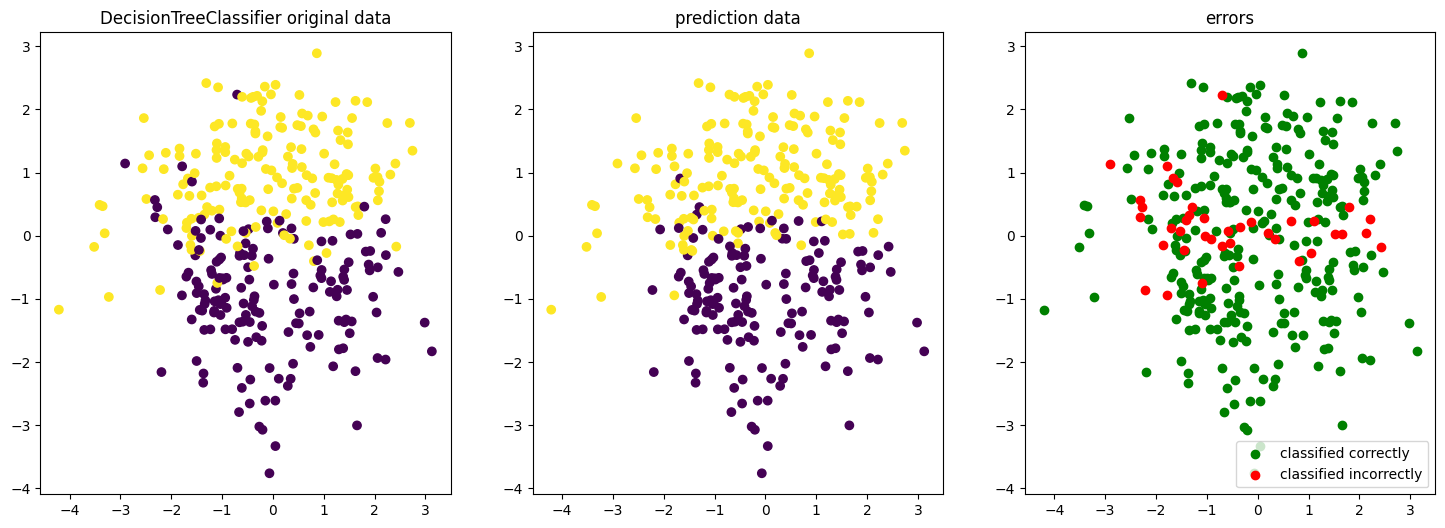

In [24]:
for clf, X_test, y_test, y_pred in error_data:
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    plt.title(f'{clf} original data')

    plt.subplot(1, 3, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
    plt.title('prediction data')

    plt.subplot(1, 3, 3)
    colors = np.where(y_test==y_pred, 'green', 'red')  
    plt.scatter(X_test[y_test==y_pred, 0], X_test[y_test==y_pred, 1], c='green')
    plt.scatter(X_test[y_test!=y_pred, 0], X_test[y_test!=y_pred, 1], c='red')
    plt.legend(['classified correctly', 'classified incorrectly'], loc='lower right')
    plt.title('errors')

    plt.plot()

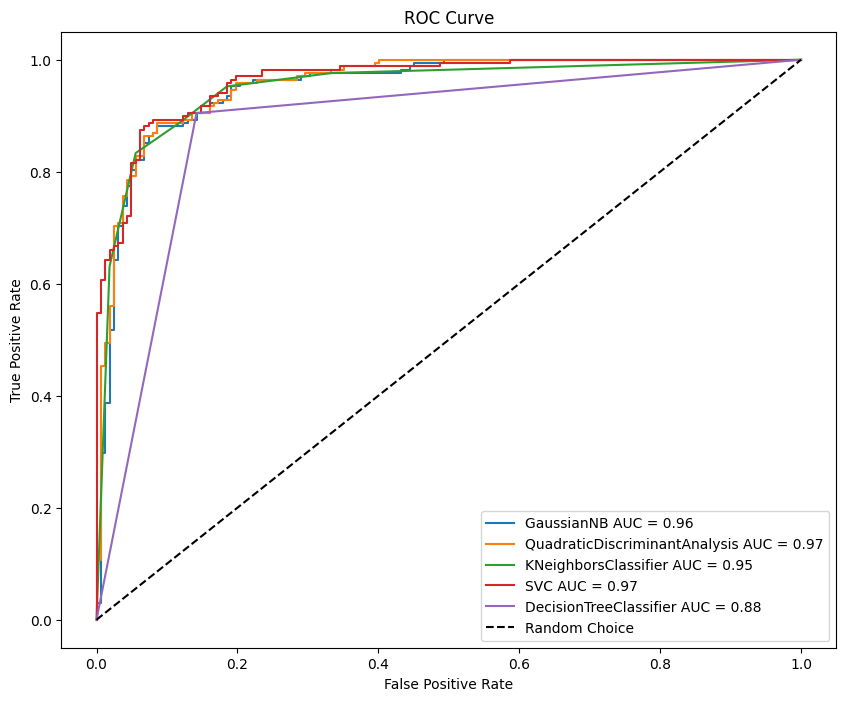

In [25]:
plt.figure(figsize=(10, 8))

for result in results:
    plt.plot(result['fpr'], result['tpr'], label=f"{result['classifier']} AUC = {result['roc_auc']:.2f}")

plt.plot([0, 1], [0, 1], 'k--', label='Random Choice')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

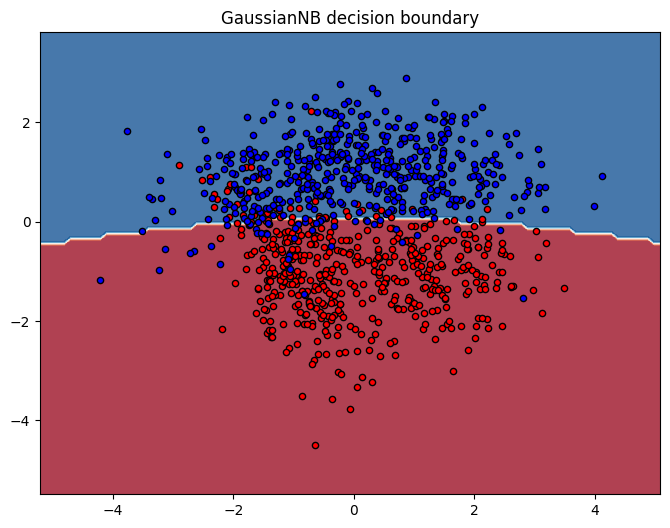

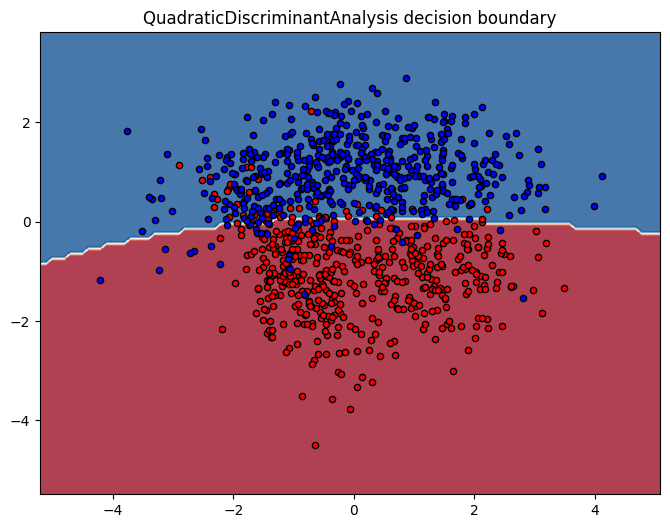

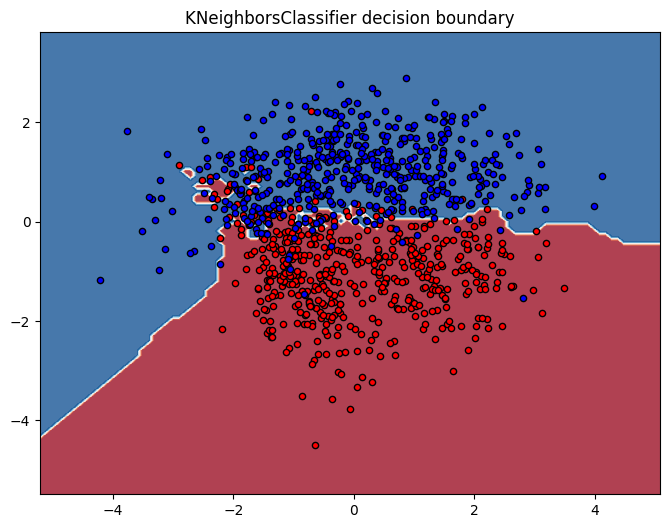

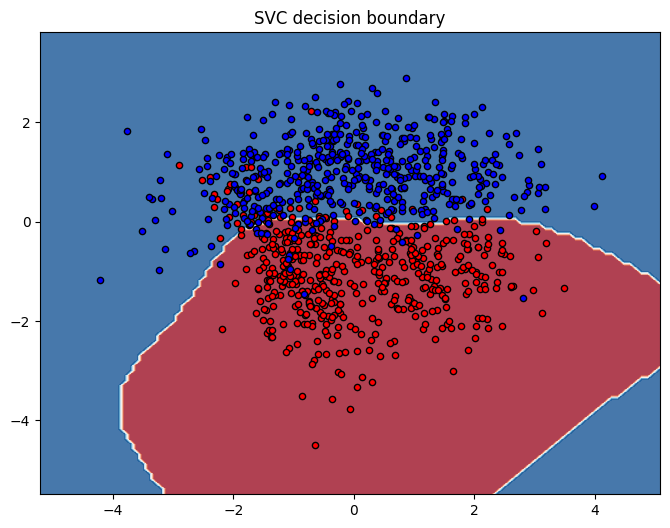

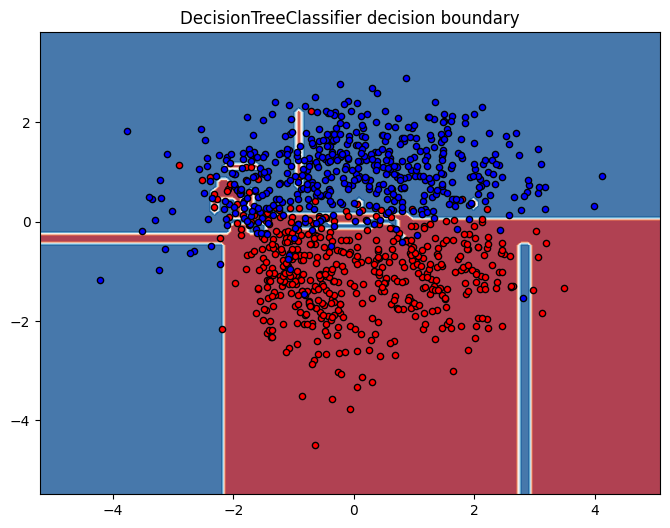

In [26]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

classifiers = [
    ('GaussianNB', GaussianNB()),
    ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('SVC', SVC(probability=True)),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]

for clf_name, clf in classifiers:
    
    clf.fit(X, y)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', edgecolor='k', s=20)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', edgecolor='k', s=20)
    plt.title(f'{clf_name} decision boundary')    
    plt.show()

In [ ]:
# W ramach tego laboratorium przeprowadzono analizę różnych klasyfikatorów, polegającą na ocenie ich wydajności.
# Klasyfikatory zostały ocenione pod kątem dokładności (accuracy), czułości (recall), precyzji (precision),
# miary F1 oraz obszaru pod krzywą ROC (AUC). Przeanalizowano również czas treningu i testowania modeli.
# Eksperymenty pokazały, że klasyfikatory różnią się pod względem skuteczności i czasu wykonania.
# Warto zaznaczyć, że wybór odpowiedniego modelu zależy od specyfiki problemu oraz wymagań dotyczących dokładności i czasu obliczeń.